## Customer Churn Analysis Project

### By: Amita Saini Internship batch 34

### Project Description
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.
Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.
Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 
You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 
#### Dataset Link-  
•	https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing CSV File
df = pd.read_csv(r'C:\Users\TCS\Desktop\Telecom_customer_churn.csv')


In [4]:
print('No. of Rows:', df.shape[0])
print('No. of Columns:', df.shape[1])
pd.set_option('display.max_columns',None) 
df.head()

No. of Rows: 7043
No. of Columns: 21


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Let us start sorting 31 Columns as per datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

#### Observations :
1. There are 3 Numerical variable and 18 categorical variable. 'CustomerID' is unnecessary variable from our analytical & modelling. So, It will be dropped.
2. There are 7043 Rows and 21 Columns in Dataset.
3. Target Variable 'Churn' is with object datatype, leading this to classification problem.
4. Under object datatype, 'TotalCharges' is there. This feature is numerical in nature but categorised as Object datatypes. So,there is presence of string variable in this column or might be data error.
5. 'SeniorCitizen' in categorical variable listed as Numerical variable. So it will be coverted into object datatype.
6. Let us Group Variable into Numerical and Categorical variables list in order to simplify further analysis. 

In [6]:
df.drop(['customerID'],axis=1,inplace=True)

In [7]:
# Let us split into Numerical & Categorical 
Categorical = [ 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod','SeniorCitizen', 'Churn']
Numerical = ['tenure','MonthlyCharges','TotalCharges']

In [8]:
# Data Integrity check
df.duplicated().sum() 

22

In [9]:
# Let us drop duplicated entry from dataset.
df.drop_duplicates(keep='last',inplace= True)

In [10]:
df.shape

(7021, 20)

In [11]:
# Let us check any whitespaces, NA,'-' in dataset. 
df.isin([' ','NA','-']).sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
# Lets check possibility of whitespaces in TotalCharges column. 
df['TotalCharges'].isin([' ']).sum().any()

True

In [13]:
# Let us replace Whitespaces with null values
df['TotalCharges']= df['TotalCharges'].replace(' ',np.nan)

In [14]:
# Converting object datatype into float
df['TotalCharges']= df['TotalCharges'].astype(float)

In [15]:
# let us check for missing values now
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                  Missing Values  % Missing data
TotalCharges                  11        0.156673
gender                         0        0.000000
SeniorCitizen                  0        0.000000
MonthlyCharges                 0        0.000000
PaymentMethod                  0        0.000000
PaperlessBilling               0        0.000000
Contract                       0        0.000000
StreamingMovies                0        0.000000
StreamingTV                    0        0.000000
TechSupport                    0        0.000000
DeviceProtection               0        0.000000
OnlineBackup                   0        0.000000
OnlineSecurity                 0        0.000000
InternetService                0        0.000000
MultipleLines                  0        0.000000
PhoneService                   0        0.000000
tenure                         0        0.000000
Dependents                     0        0.000000
Partner                        0        0.000000
Churn               

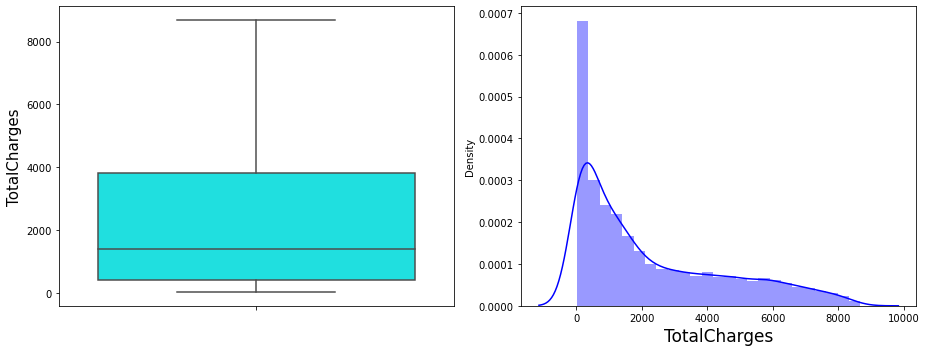

In [16]:
# Let us impute missing value in TotalCharges either with mean and median as per distribution and Outliers in data
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(y='TotalCharges', data=df,color='cyan')
plt.ylabel('TotalCharges',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['TotalCharges'], color='b')
plt.xlabel('TotalCharges',fontsize=17)
plt.tight_layout()
plt.show()

In [17]:
print("Mean of Total Charges:",df['TotalCharges'].mean())
print("Median of Total Observation:
We can see that Outliers doesnot exist, so no mean sensitivity issue present here.
Distribution plot shows that Total Charges feature is right skewed.
Mean is greater than Median.Charges:",df['TotalCharges'].median())

Mean of Total Charges: 2290.353388017122
Median of Total Charges: 1403.875


### Observations:
1. Outliers doesnot exist, so no mean sensitivity issue present here.
2. Distribution plot shows that Total Charges feature is right skewed.
3. Mean is greater than Median.
4. So, let us impute Missing value with Mean

In [19]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

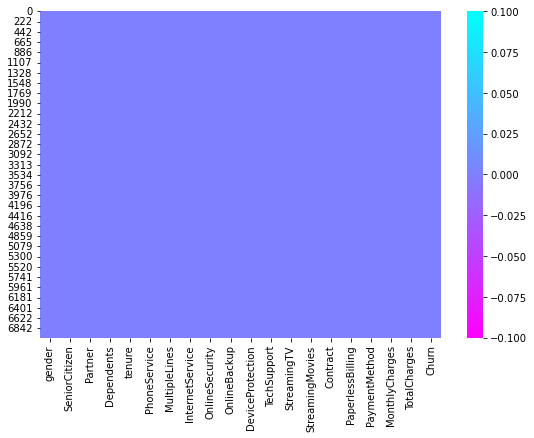

In [20]:
# Let us Check for Null values after Imputation
plt.figure(figsize=(9,6))
sns.heatmap(df.isnull(),cmap="cool_r")
plt.show()

#### Observations:
1. No Missing Value is Present to proceed further.



In [21]:
# Let us check Statistical Matrix
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7021.000000,0.162512,0.368947,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,7021.000000,32.469449,24.534965,0.000000,9.000000,29.000000,55.000000,72.000000
MonthlyCharges,7021.000000,64.851894,30.069001,18.250000,35.750000,70.400000,89.900000,118.750000
TotalCharges,7021.000000,2290.353388,2265.044136,18.800000,411.150000,1410.250000,3801.700000,8684.800000


In [22]:
df[Categorical].describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7021.0,0.162512,0.368947,0.0,0.0,0.0,0.0,1.0


In [23]:
# Let us start with Enlisting Value counts & Sub-categories of different categorial features available to know customer
for i in Categorical:
    print(i)
    print(df[i].value_counts())
    print("="*100)

gender
Male      3541
Female    3480
Name: gender, dtype: int64
Partner
No     3619
Yes    3402
Name: Partner, dtype: int64
Dependents
No     4911
Yes    2110
Name: Dependents, dtype: int64
PhoneService
Yes    6339
No      682
Name: PhoneService, dtype: int64
MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64
OnlineSecurity
No                     3490
Yes                    2019
No internet service    1512
Name: OnlineSecurity, dtype: int64
OnlineBackup
No                     3080
Yes                    2429
No internet service    1512
Name: OnlineBackup, dtype: int64
DeviceProtection
No                     3087
Yes                    2422
No internet service    1512
Name: DeviceProtection, dtype: int64
TechSupport
No                     3465
Yes                    2044
No internet service    1512
Name: T

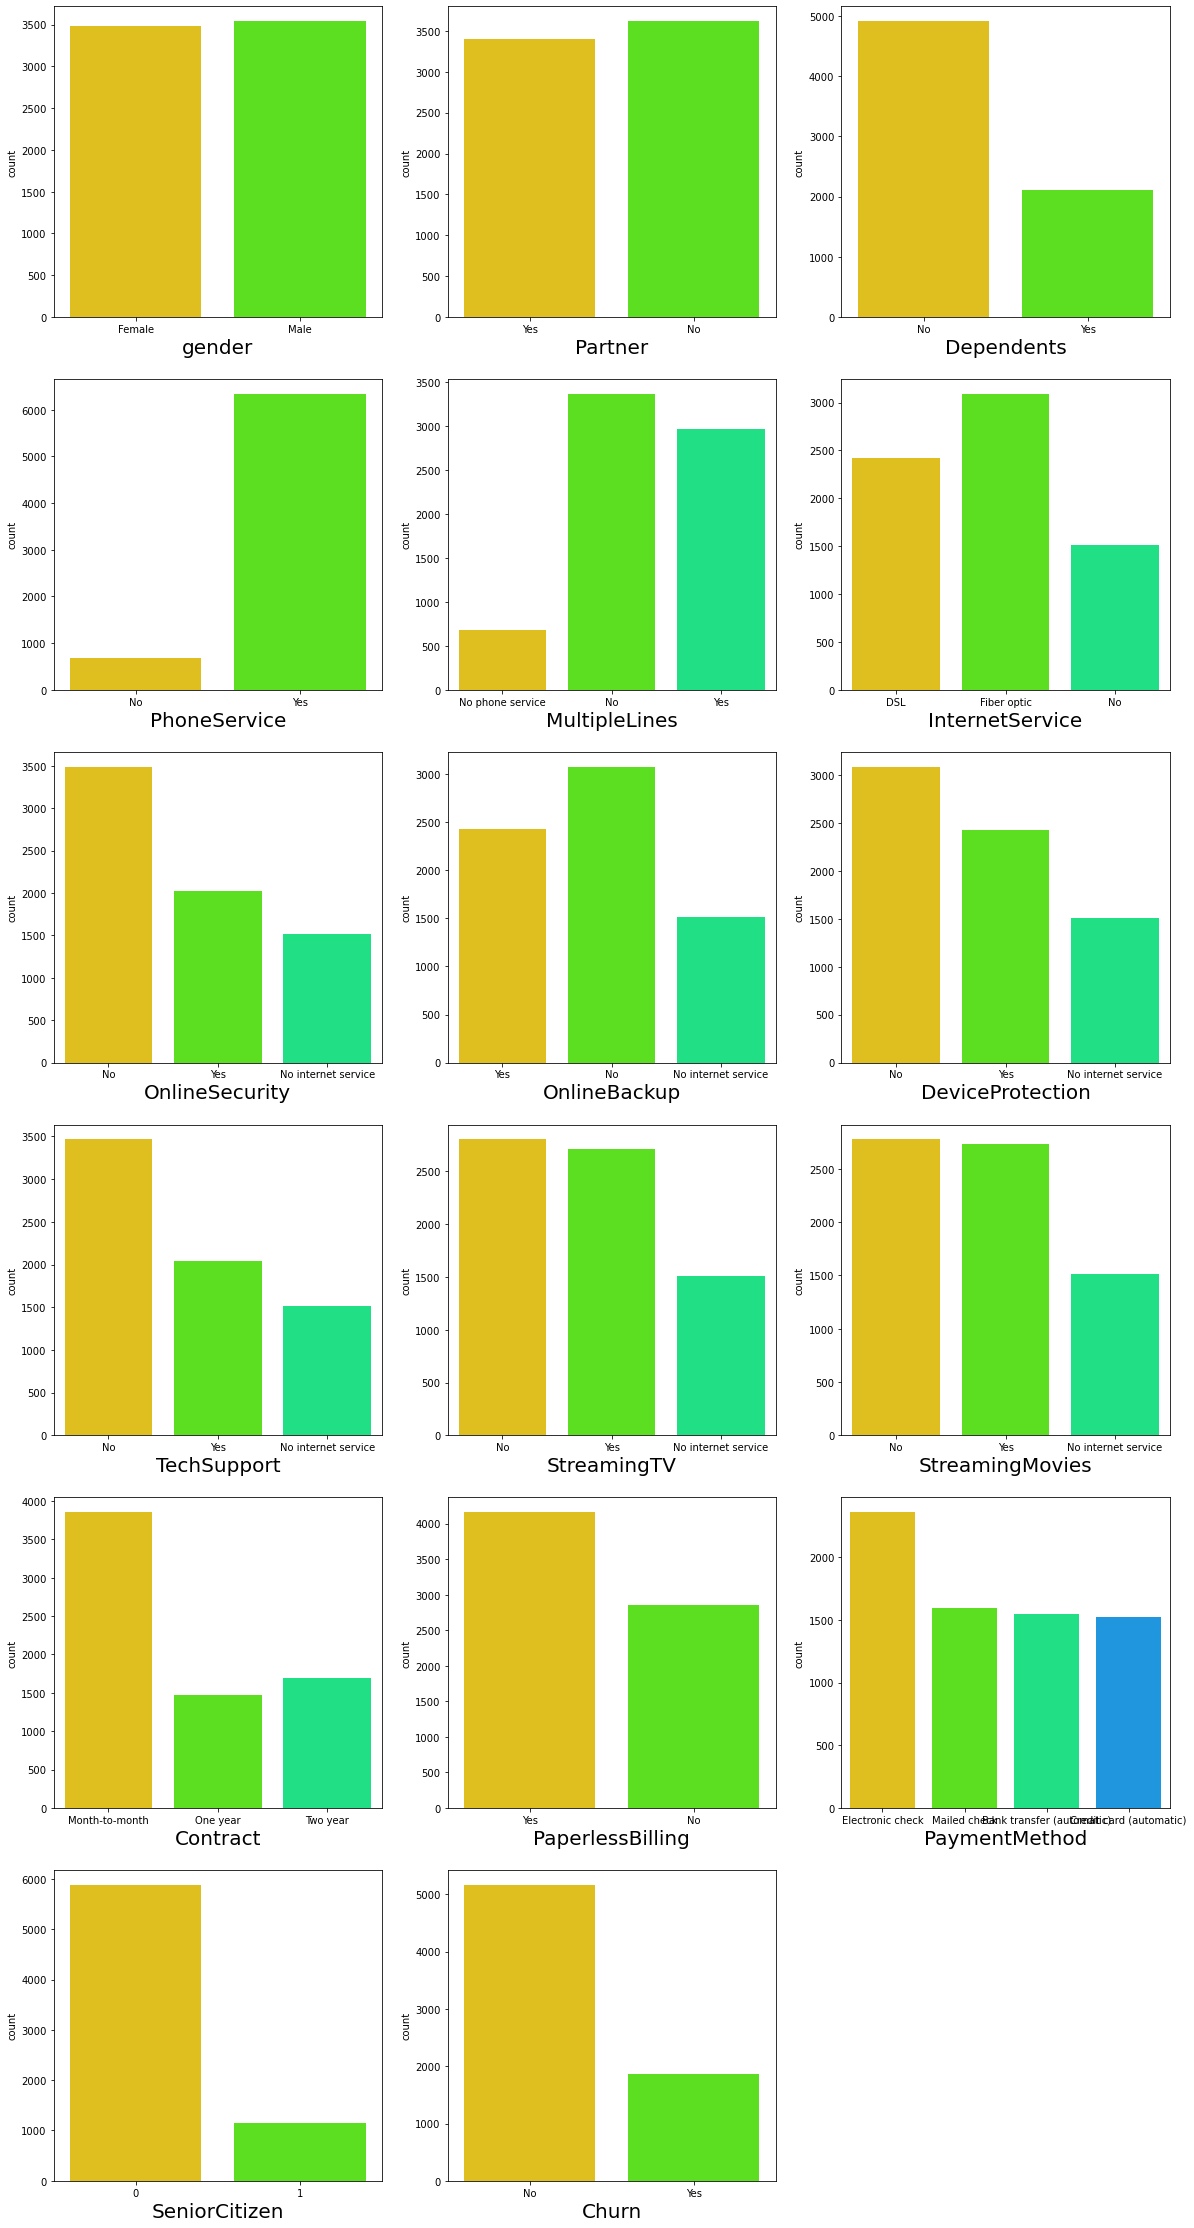

In [24]:
sns.set_palette('hsv')
plt.figure(figsize=(20,40), facecolor='white')
plotnumber =1
for i in Categorical:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

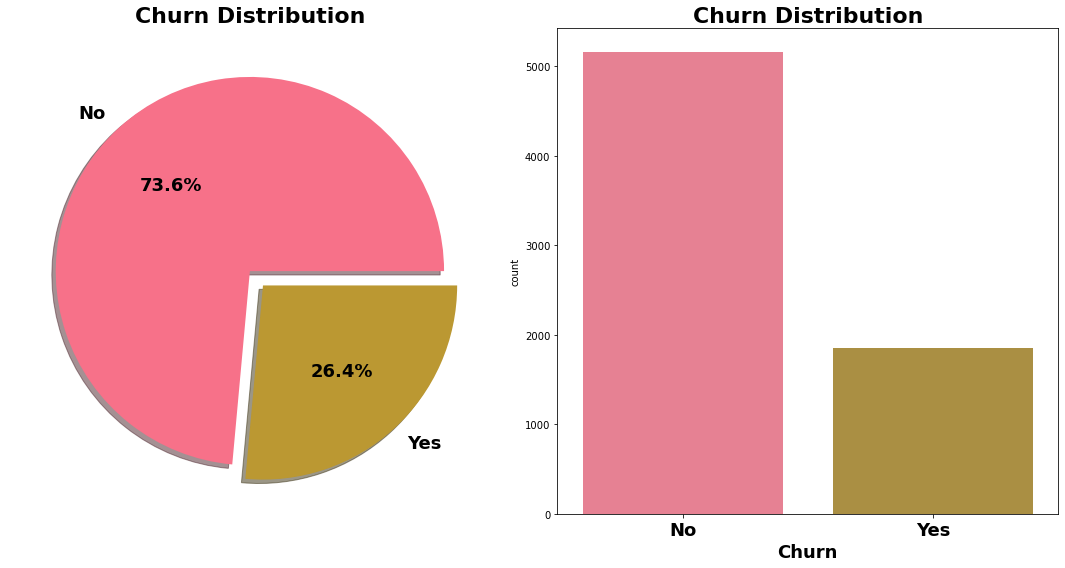

In [25]:
# Let us explore Target Variable Churn
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(15,8))
df['Churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Churn Distribution', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Churn',data=df,ax=ax[1])
ax[1].set_title('Churn Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Churn",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

#### Observations:
1. 26.4 % Customer chose to churn service in last month that is quite high.This leads to imbalanced data case as churn is target variable.


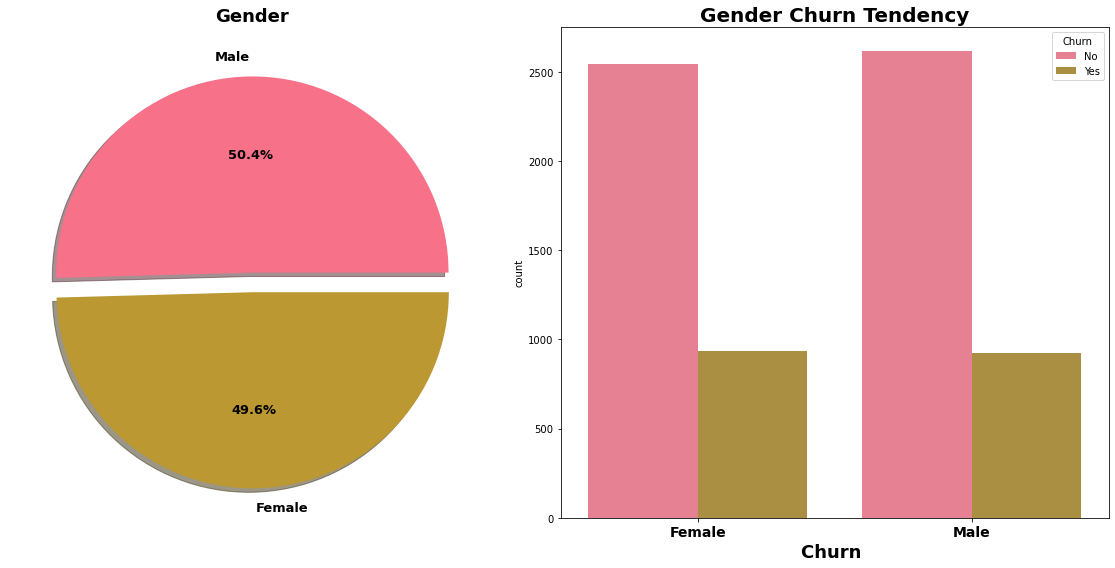

In [26]:
# Let us start exploration of Independent feature to check customer dissatisfaction and customers need or inclination
# Gender vs Churn
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,8))
df['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Gender', fontsize=18,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('gender',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Gender Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Churn ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [27]:
pd.crosstab(df['gender'],df["Churn"],margins=True).style.background_gradient(cmap='summer_r')

Churn,No,Yes,All
gender,,,
Female,2546,934,3480
Male,2618,923,3541
All,5164,1857,7021


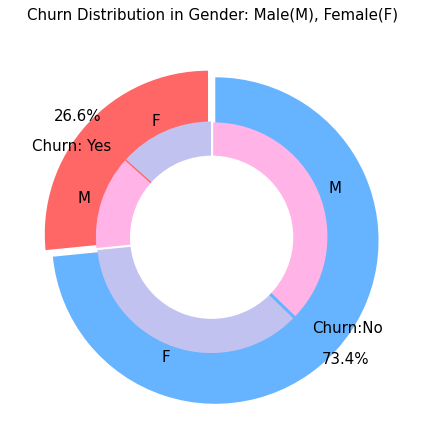

In [28]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution in Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

# Observations:
1. Both gender are in same proportion with minor difference.


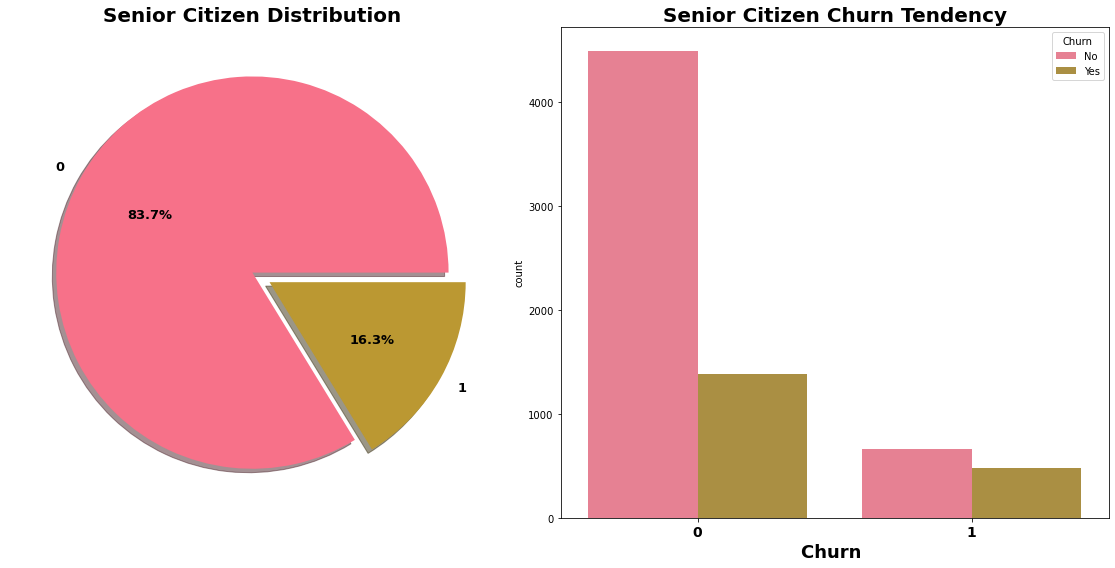

In [30]:
# Let us investigate Senior Citizen vs Gender Wise Churn
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['SeniorCitizen'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Senior Citizen Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('SeniorCitizen',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Senior Citizen Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Churn ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations:
Only 16.3 % of the customers are senior citizens. So,most customers in the data are younger people.

In [31]:
pd.crosstab([df.gender,df.SeniorCitizen],df["Churn"],margins=True).style.background_gradient(cmap='summer_r')

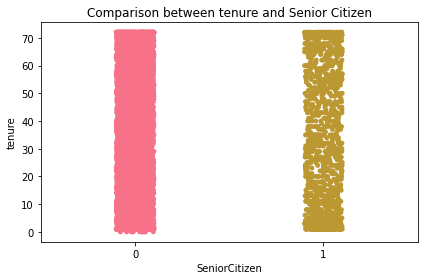

In [32]:
# Let us Compare tenure and Senior Citizen
plt.title("Comparison between tenure and Senior Citizen")
sns.stripplot(x = "SeniorCitizen",y="tenure",data = df)
plt.show()

#### Observations:
1. Almost 16% customers are Senior citizens.From countplot, they have more tendency to churn.
2. There is no significant relation between Senior Citizen and Tenure.

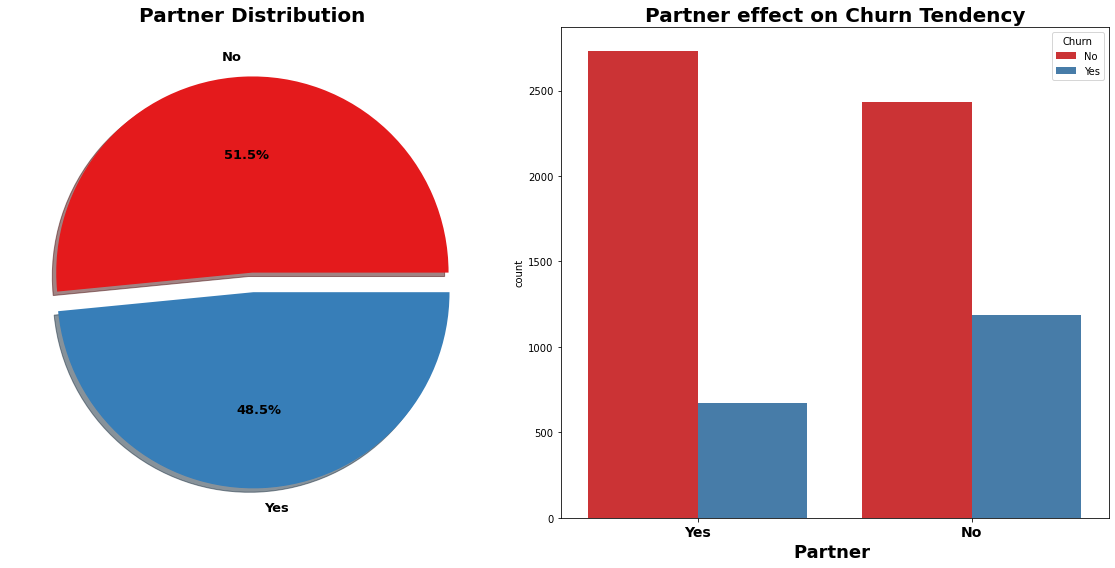

In [33]:
# Effect of Partner and Dependents on Churn
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Partner'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Partner Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Partner',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Partner effect on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Partner ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

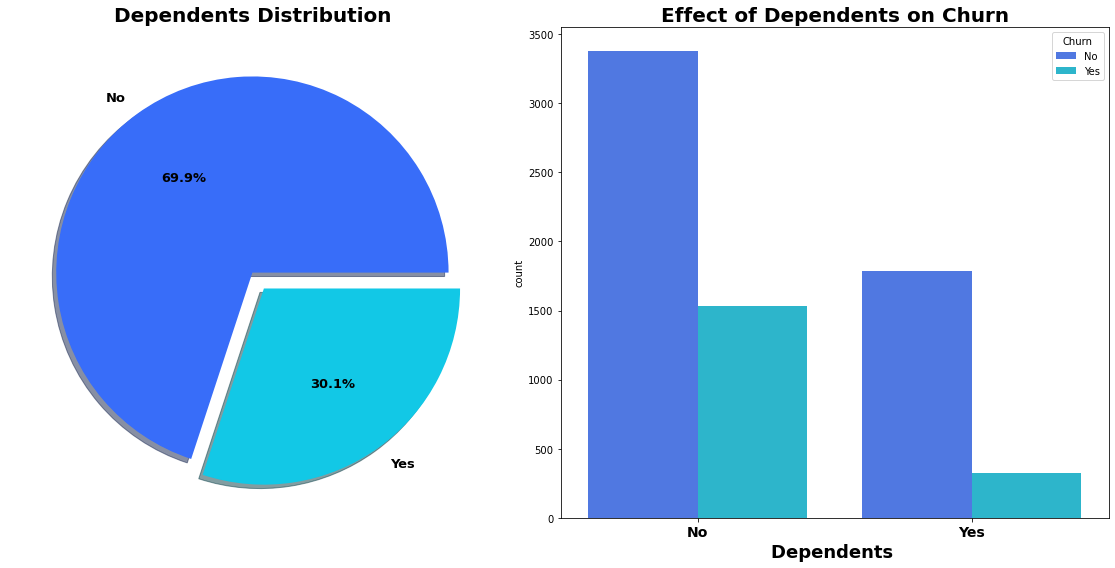

In [34]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Dependents'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Dependents Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Dependents',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Dependents on Churn',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Dependents ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations:
1. Customers having Partner have less tendency to Churn.
2. Almost 30% Customer have dependents on them and they also have less tendency to churn compare to remaining 70%

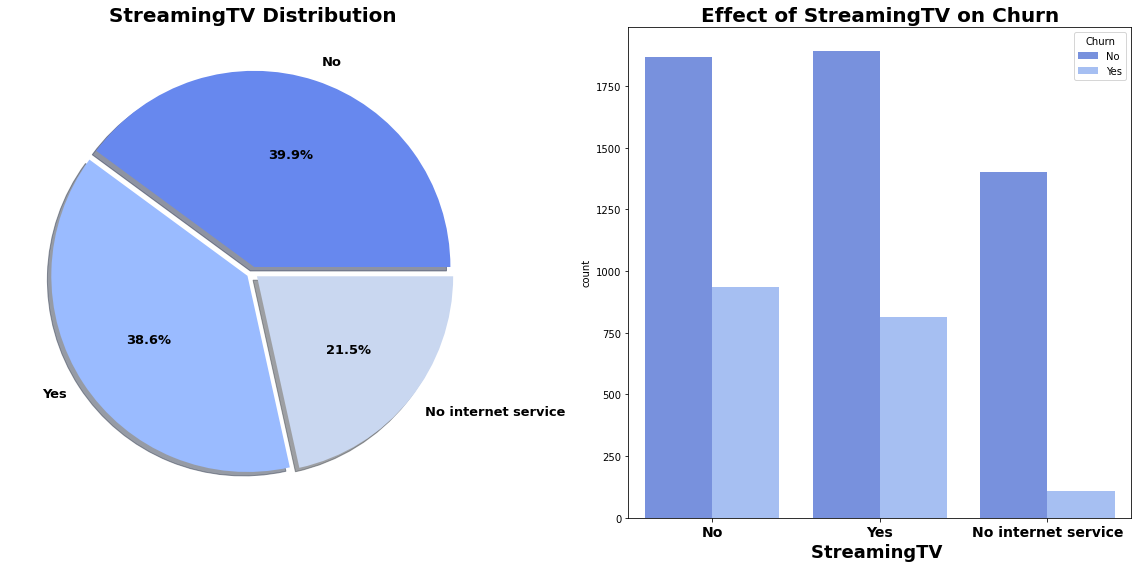

In [35]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('coolwarm')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['StreamingTV'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('StreamingTV Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('StreamingTV',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of StreamingTV on Churn',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("StreamingTV ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

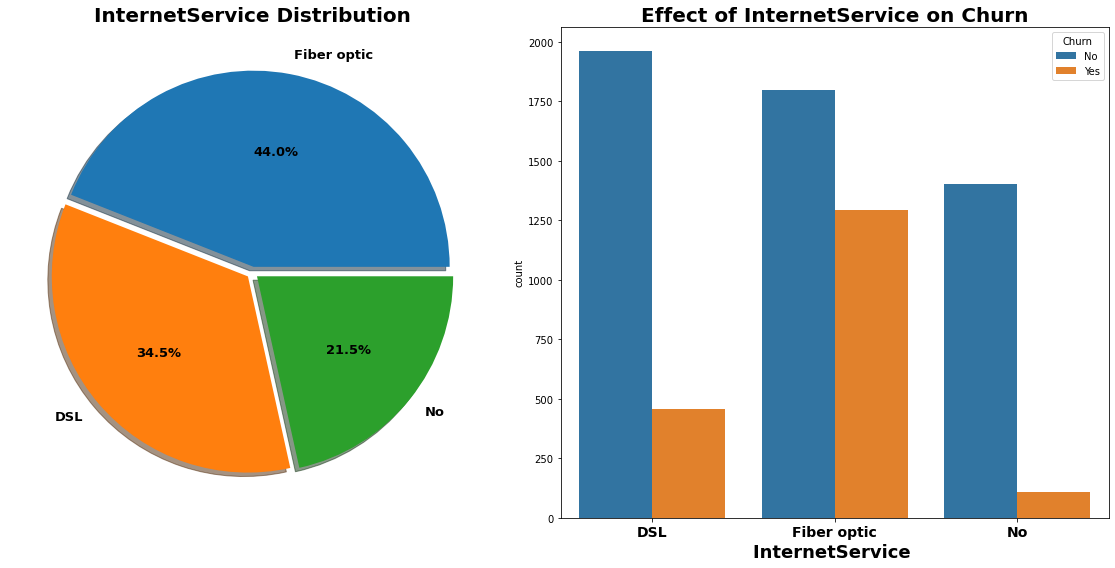

In [36]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('tab10')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['InternetService'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('InternetService Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('InternetService',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of InternetService on Churn',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("InternetService ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

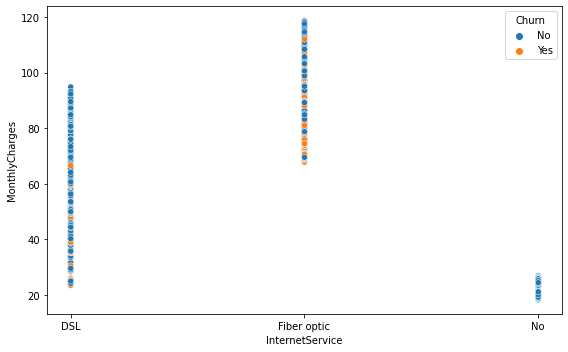

In [37]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="InternetService", y='MonthlyCharges',data=df,hue="Churn")
plt.show()

#### Observations:
1. 44% Customers perfer Fibre optic as Interent service and there is high churn rate among them.

2. High monthly charges among customers using fiber optic compare to DSL.So, High charges is reason of customer churn.

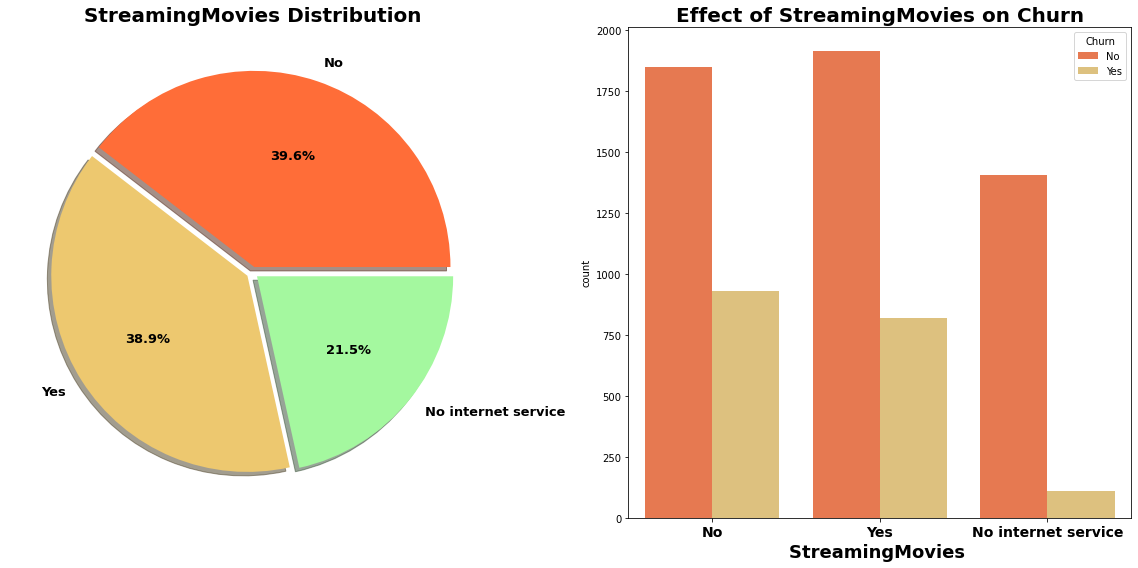

In [38]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow_r')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['StreamingMovies'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('StreamingMovies Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('StreamingMovies',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of StreamingMovies on Churn',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("StreamingMovies ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations:
Almost same churn in streaming movies or not.

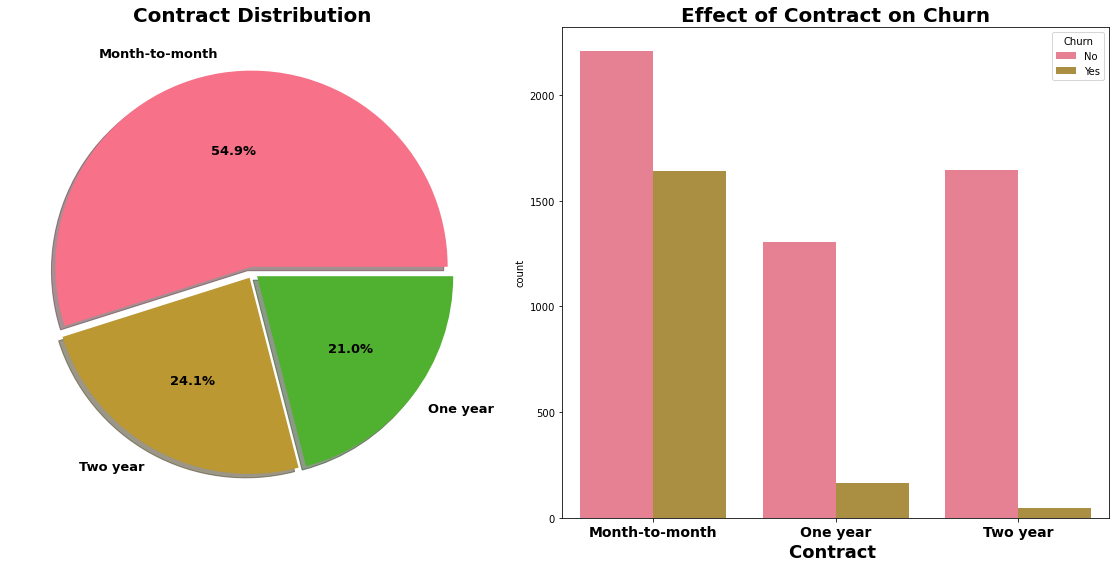

In [39]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Contract'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Contract Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Contract',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Contract on Churn',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Contract ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

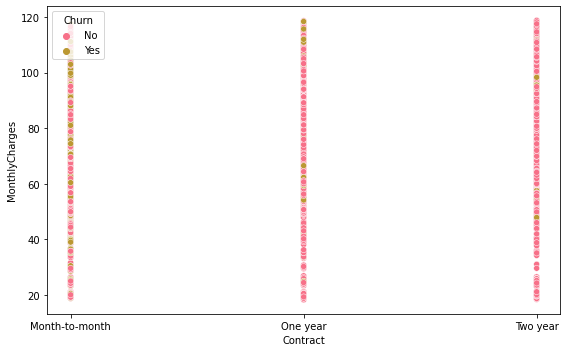

In [40]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Contract", y='MonthlyCharges',data=df,hue="Churn")
plt.show()

#### Observations:
1. Almost 55% customer perfer month to month contract compare to other.Also, there is high churn rate in these customers.
2. there is no relation between Monthly charges and contract tenure.

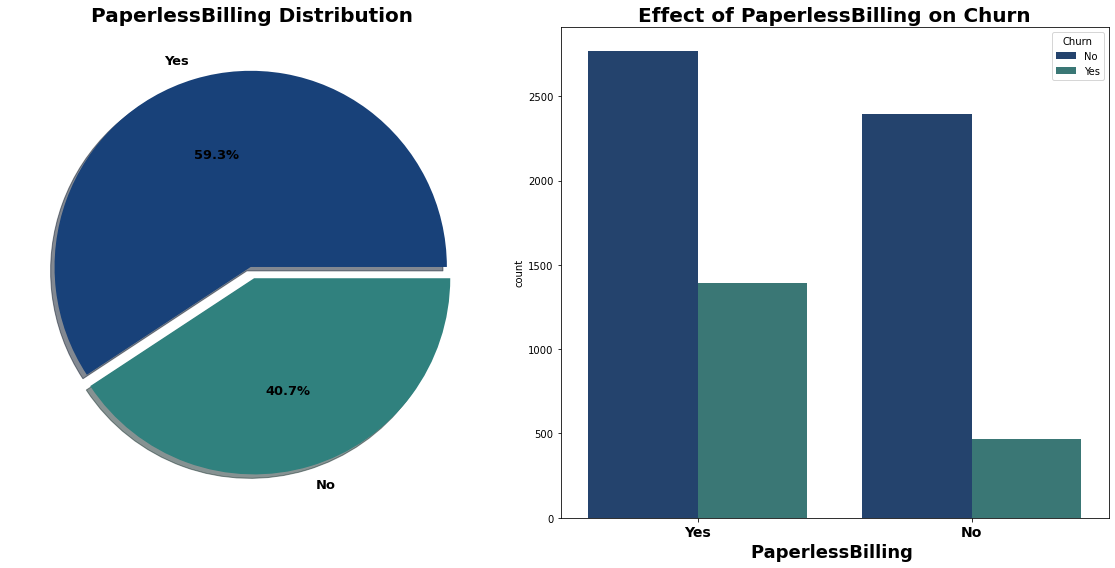

In [41]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gist_earth')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['PaperlessBilling'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('PaperlessBilling Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('PaperlessBilling',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of PaperlessBilling on Churn',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("PaperlessBilling ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations:
1. 60% Customer perfer paperless billing.

2. The customers who prefer paperless billing they have high churn rate.

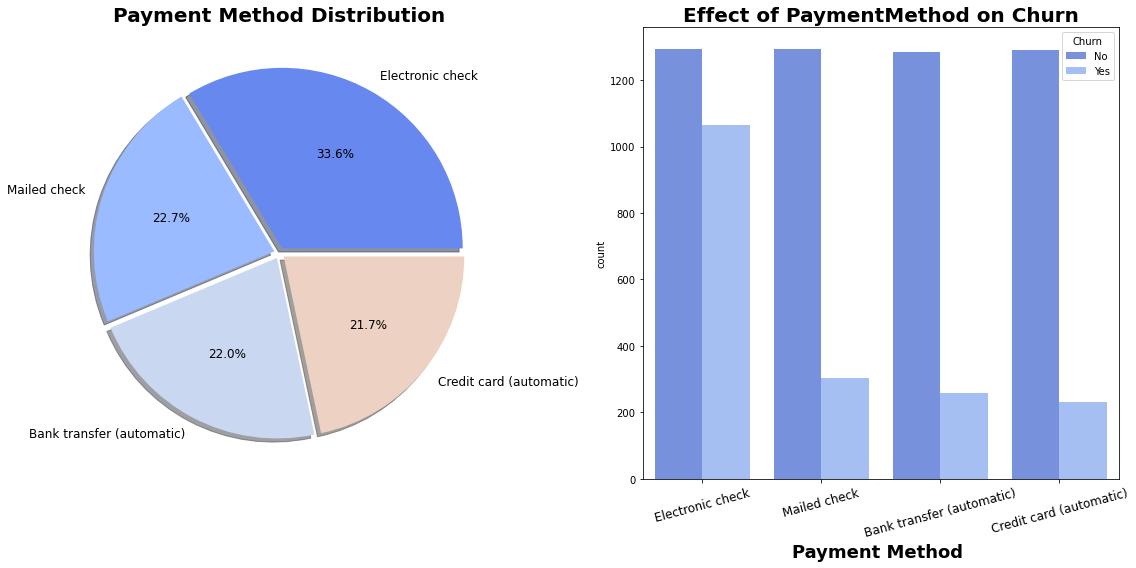

In [42]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('coolwarm')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['PaymentMethod'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontsize':12}, ax=ax[0],shadow=True)
ax[0].set_title('Payment Method Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('PaymentMethod',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of PaymentMethod on Churn',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Payment Method ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,rotation=15)
plt.tight_layout()
plt.show()

#### Observations:

There is high churn tendency in customer who pay by Electronic check.

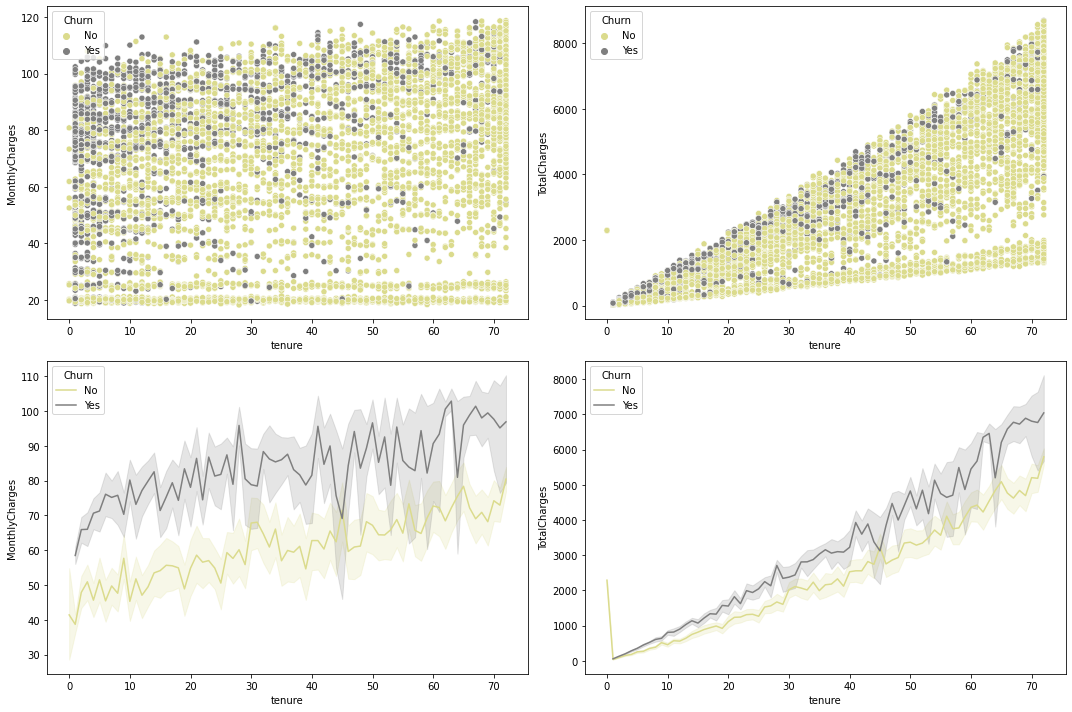

In [43]:
sns.set_palette('tab20_r')
fig , ax=plt.subplots(2,2, figsize=(15,10))
for i,col in enumerate(["MonthlyCharges","TotalCharges"]):
    sns.scatterplot(ax=ax[0,i],x="tenure", y=col,data=df,hue="Churn")
    sns.lineplot(ax=ax[1,i],x="tenure", y=col,data=df,hue="Churn")

#### Observations:

1. High Monthly Charges in customer who choose churn compare to rest.
2. Also, High Total Charges in customer who choose churn compare to rest.


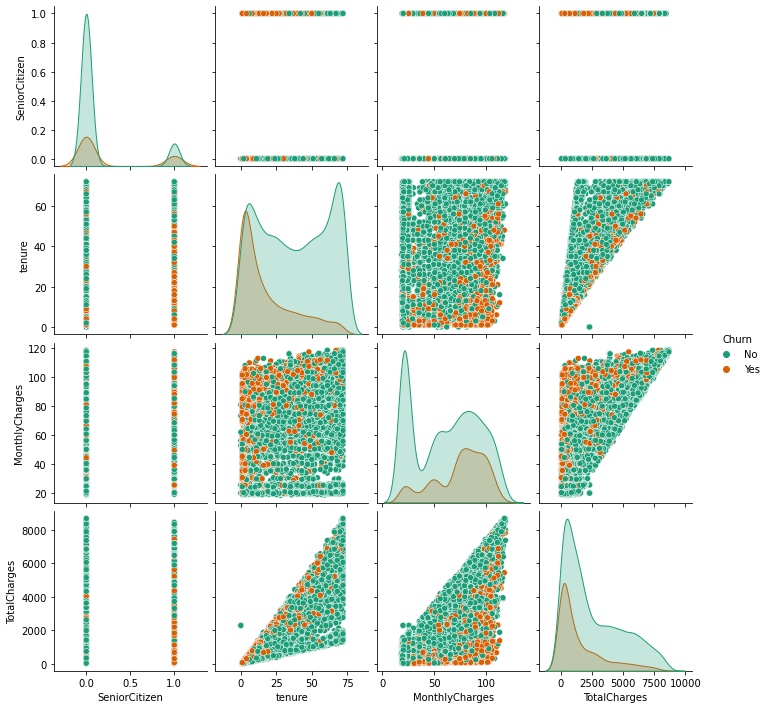

In [44]:
sns.pairplot(df,hue="Churn",palette="Dark2")

In [45]:
# Let us encode categorical data
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges', 'TotalCharges'], object: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']}

In [46]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [47]:
Numerical =['tenure','MonthlyCharges', 'TotalCharges']

In [48]:
Category =['gender', 'Partner','PhoneService', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 
           'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [49]:
# Let us Use Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


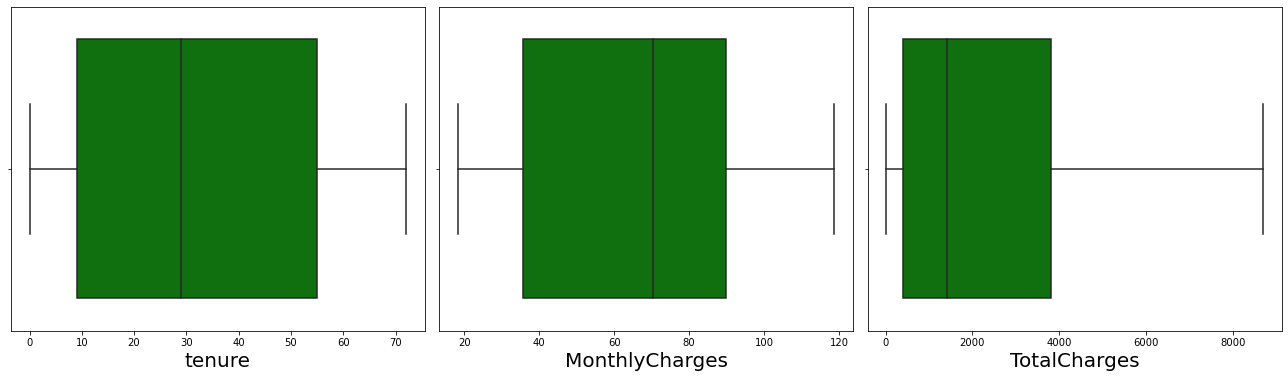

In [50]:
# Let us detect Outliers and Remove
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [51]:
# Let us remove Outliers using Zscore method
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() 

Shape of the dataframe before removing outliers:  (7021, 20)
Shape of the dataframe after removing outliers:  (6339, 20)
Percentage of data loss post outlier removal:  9.713715994872524


In [52]:
df.drop(['PhoneService'],axis=1,inplace=True)

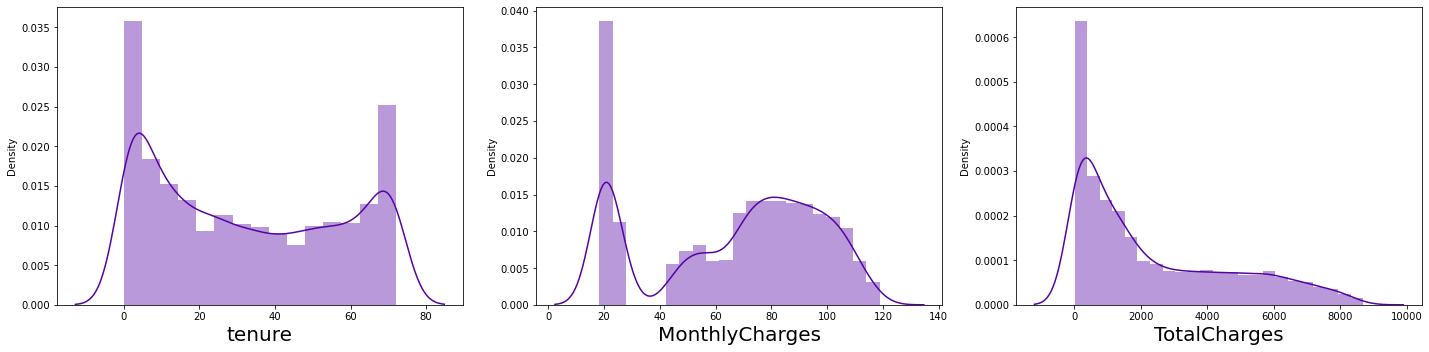

In [53]:
# let us check Skewness of features
plt.figure(figsize=(20,5),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in Numerical:
    if plotnum<=3:
        plt.subplot(1,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

#### Observations: 
1. Skewness is important feature for continous data.
2. There is no relevence of skweness for discrete numerical feature like month and categorical feature.
So Let us ignore skewness present in discrete numerical and categorical feature.

In [54]:
df.skew()

gender             -0.012939
SeniorCitizen       1.819335
Partner             0.049562
Dependents          0.871194
tenure              0.233517
MultipleLines       0.125532
InternetService     0.051965
OnlineSecurity      0.421216
OnlineBackup        0.166121
DeviceProtection    0.181524
TechSupport         0.408970
StreamingTV        -0.005185
StreamingMovies    -0.012505
Contract            0.624212
PaperlessBilling   -0.388673
PaymentMethod      -0.165613
MonthlyCharges     -0.404120
TotalCharges        0.895850
Churn               1.058644
dtype: float64

#### Observations: 
1. 'tenure','MonthlyCharges', 'TotalCharges' are continous numerical feature in dataset.
2. From these, TotalCharges is skewed in nature  which will be transformed here.

In [56]:
# Correlation
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.005846,-0.002207,0.015722,0.001891,-0.006391,0.000983,-0.016826,-0.009353,-0.003121,-0.009769,-0.005624,-0.002760,0.000674,-0.018131,0.021961,-0.011639,0.000441,-0.011391
SeniorCitizen,-0.005846,1.000000,0.013943,-0.213486,0.017647,0.152954,-0.039479,-0.123668,-0.020710,-0.023590,-0.144694,0.028453,0.047062,-0.141107,0.155193,-0.041891,0.238426,0.109070,0.149599
Partner,-0.002207,0.013943,1.000000,0.453409,0.382932,0.147545,-0.004099,0.151348,0.154738,0.167390,0.132266,0.133353,0.127676,0.297393,-0.010458,-0.147854,0.088571,0.318750,-0.153262
Dependents,0.015722,-0.213486,0.453409,1.000000,0.159194,-0.028535,0.053701,0.146427,0.090389,0.082944,0.130166,0.048859,0.023932,0.242286,-0.106970,-0.037411,-0.131791,0.057963,-0.158628
tenure,0.001891,0.017647,0.382932,0.159194,1.000000,0.358098,-0.034932,0.326356,0.377187,0.367678,0.324457,0.282710,0.292966,0.674586,0.002370,-0.361878,0.242184,0.828224,-0.348882
MultipleLines,-0.006391,0.152954,0.147545,-0.028535,0.358098,1.000000,-0.107675,0.006752,0.125043,0.130055,0.011287,0.187307,0.193380,0.114261,0.174017,-0.183244,0.454819,0.464546,0.042438
InternetService,0.000983,-0.039479,-0.004099,0.053701,-0.034932,-0.107675,1.000000,-0.027406,0.030417,0.049829,-0.022841,0.099513,0.094169,0.115528,-0.164085,0.096674,-0.470605,-0.241664,-0.058968
OnlineSecurity,-0.016826,-0.123668,0.151348,0.146427,0.326356,0.006752,-0.027406,1.000000,0.198167,0.173275,0.283252,0.046717,0.062345,0.367667,-0.154346,-0.089597,-0.071808,0.255353,-0.289182
OnlineBackup,-0.009353,-0.020710,0.154738,0.090389,0.377187,0.125043,0.030417,0.198167,1.000000,0.195604,0.210090,0.151646,0.139587,0.286126,-0.019141,-0.126394,0.110079,0.382399,-0.201206
DeviceProtection,-0.003121,-0.023590,0.167390,0.082944,0.367678,0.130055,0.049829,0.173275,0.195604,1.000000,0.241956,0.278088,0.284397,0.342751,-0.040732,-0.132907,0.154859,0.391057,-0.176171


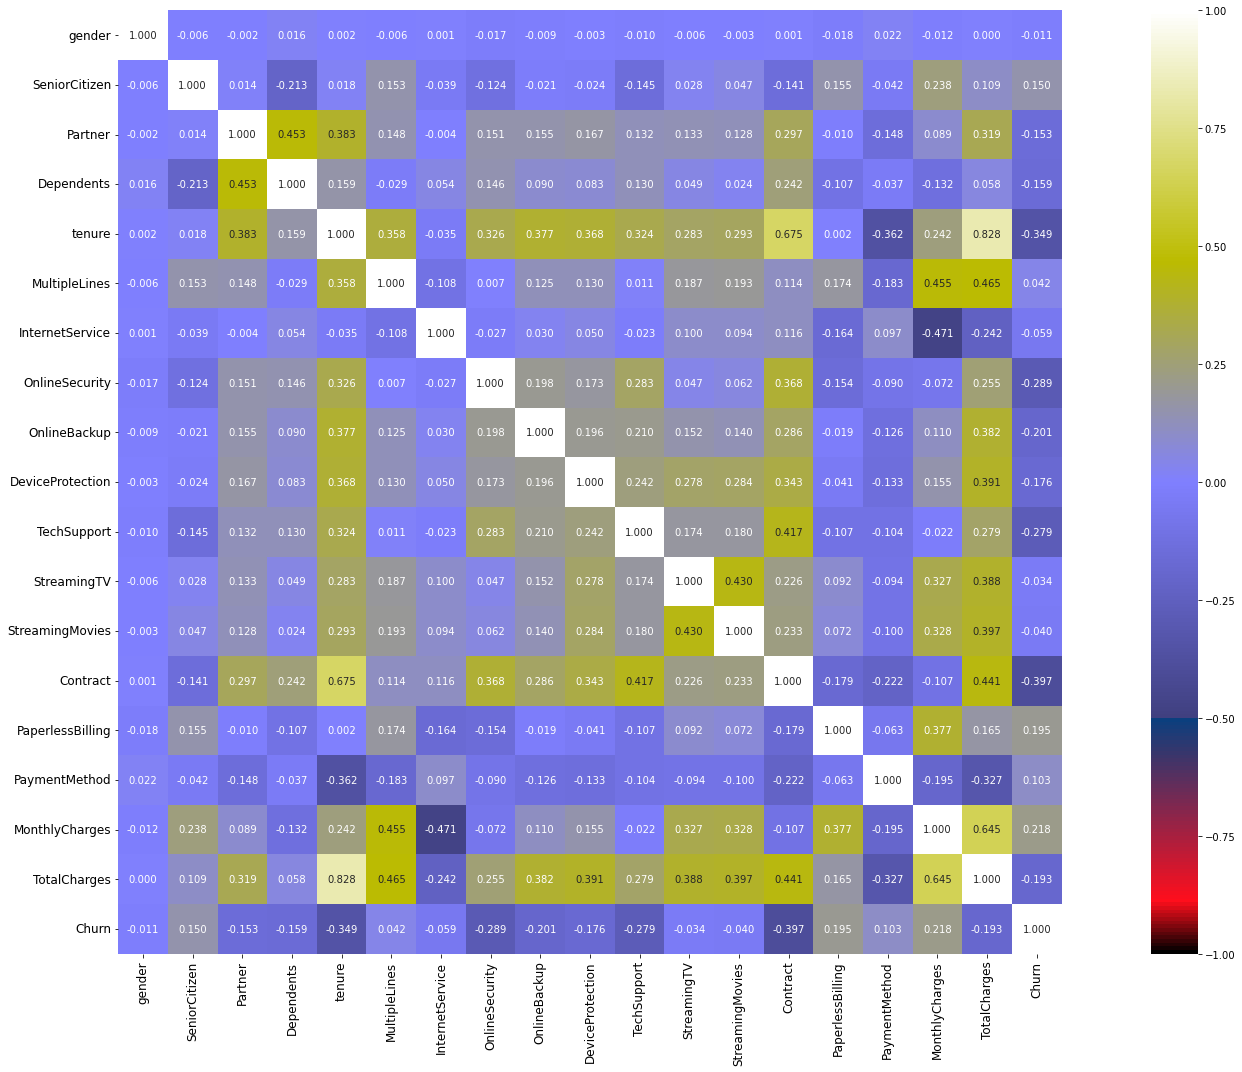

In [57]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

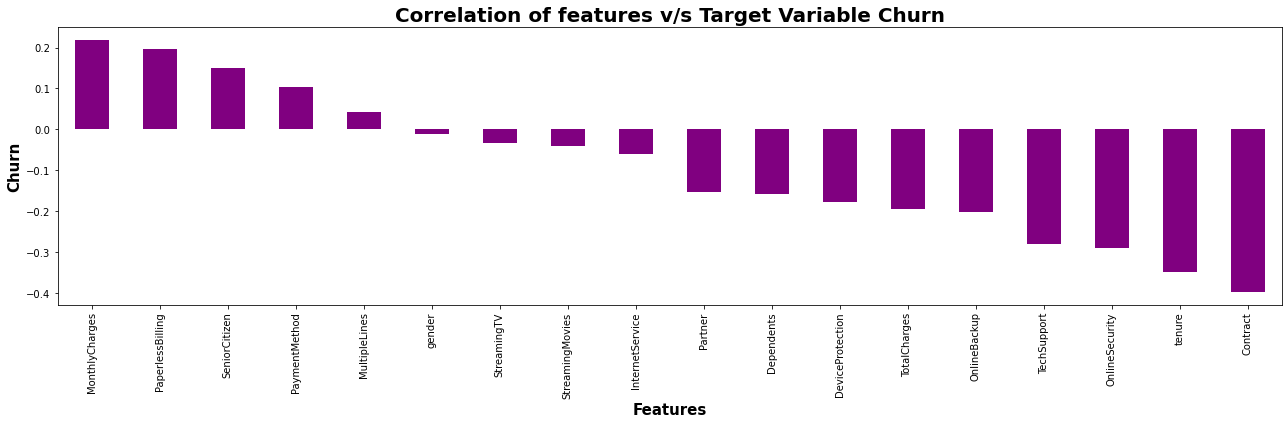

In [58]:
plt.figure(figsize = (18,6))
df.corr()['Churn'].drop(['Churn']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Churn',fontsize=15,fontweight='bold')
plt.title('Correlation of features v/s Target Variable Churn',fontsize = 20,fontweight='bold')
plt.show()

In [59]:
# Balanceing Imbalanced target feature
df.Churn.value_counts()

0    4652
1    1687
Name: Churn, dtype: int64

#### Observations:
As Target variable data is Imbalanced in nature, Let us balance target variable.

In [60]:
# As Target variable data is Imbalanced in nature we will need to balance target variable.
# Balancing using SMOTE
from imblearn.over_sampling import SMOTE

In [61]:
# Splitting data in target and dependent feature
X = df.drop(['Churn'], axis =1)
Y = df['Churn']

In [62]:
# Oversampleing using SMOTE
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [63]:
Y.value_counts()

0    4652
1    4652
Name: Churn, dtype: int64

#### Observations: 
Resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.

In [64]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [65]:
#Checking Multicollinearity between features using variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.025313,gender
1,1.094845,SeniorCitizen
2,1.545212,Partner
3,1.436936,Dependents
4,9.178976,tenure
5,1.412383,MultipleLines
6,1.424674,InternetService
7,1.362748,OnlineSecurity
8,1.309079,OnlineBackup
9,1.346852,DeviceProtection


#### Observations
Independent feature VIF is within permissible limit of 10

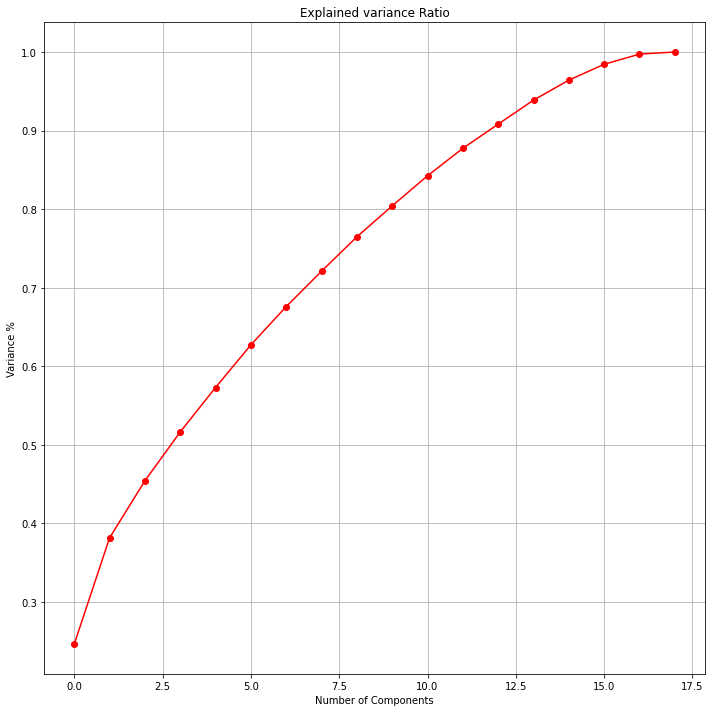

In [66]:
# PCA

from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

#### Observations:
13 principal components attribute for 90% of variation in the data. Let us pick the first 13 components for our prediction.    

In [67]:
pca_new = PCA(n_components=13)
x_new = pca_new.fit_transform(X_scale)

In [68]:
principle_x=pd.DataFrame(x_new,columns=np.arange(13))

### Machine Learning Model Building

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (6512, 13)
Training target vector size: (6512,)
Test feature matrix size: (2792, 13)
Test target vector size: (2792,)


### Finding best Random state

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8212750716332379 on Random_state 8


In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=90, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8144699140401146


Confusion matrix of Logistics Regression : 
 [[1092  323]
 [ 195 1182]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.85      0.77      0.81      1415
           1       0.79      0.86      0.82      1377

    accuracy                           0.81      2792
   macro avg       0.82      0.82      0.81      2792
weighted avg       0.82      0.81      0.81      2792



### Let us Find Optimal value of n_neighbors for KNN

In [73]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.47952340235878177
RMSE value for k=  2 is: 0.49132882213576484
RMSE value for k=  3 is: 0.4678028874935232
RMSE value for k=  4 is: 0.46008283793795546
RMSE value for k=  5 is: 0.45735003491992954
RMSE value for k=  6 is: 0.44745379617728914
RMSE value for k=  7 is: 0.44383713680973264
RMSE value for k=  8 is: 0.4369239965904386
RMSE value for k=  9 is: 0.44825353550383795
RMSE value for k=  10 is: 0.44544816619659383
RMSE value for k=  11 is: 0.45617382199543793
RMSE value for k=  12 is: 0.44865287058125713
RMSE value for k=  13 is: 0.45578107648827826
RMSE value for k=  14 is: 0.4518348457054815
RMSE value for k=  15 is: 0.45617382199543793
RMSE value for k=  16 is: 0.4506442379819818
RMSE value for k=  17 is: 0.4565662296568125
RMSE value for k=  18 is: 0.45381225053898117
RMSE value for k=  19 is: 0.45617382199543793
RMSE value for k=  20 is: 0.4534174594676999


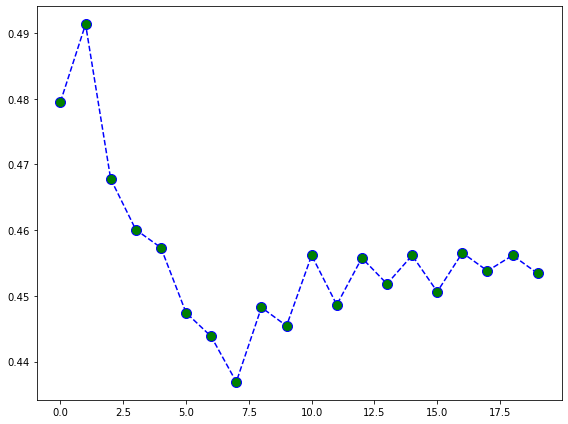

In [74]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(20), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.show()

Comment-

At k=18, we get the minimum RMSE value which approximately 0.44059740636840716, and shoots up on further increasing the k value. We can safely say that k=18 will give us the best result in this case

Applying other classification algorithm

In [75]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 18),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.8144699140401146


Confusion matrix : 
 [[1092  323]
 [ 195 1182]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.77      0.81      1415
           1       0.79      0.86      0.82      1377

    accuracy                           0.81      2792
   macro avg       0.82      0.82      0.81      2792
weighted avg       0.82      0.81      0.81      2792



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.829512893982808


Confusion matrix : 
 [[1181  234]
 [ 242 1135]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1415
           1       0.83      0.82      0.83      1377

    accuracy                           0.83      2792
   macro avg       0.83      0.83      0.83      2792
weighted avg       0.83      0.83      0.

CrossValidation :

In [76]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 18),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.74744761 0.7307899  0.80763031 0.80924234 0.82365591]
Mean Score : 0.7837532139617387
Std deviation : 0.037243110798815364




Cross Validation Score SVC() :

Score : [0.72756582 0.73562601 0.82267598 0.83181085 0.84086022]
Mean Score : 0.7917077764873781
Std deviation : 0.049482529272542035




Cross Validation Score GaussianNB() :

Score : [0.69532509 0.71789361 0.8205266  0.82267598 0.84247312]
Mean Score : 0.7797788794323782
Std deviation : 0.06065201477641697




Cross Validation Score DecisionTreeClassifier() :

Score : [0.66200967 0.69693713 0.79419667 0.78291241 0.78817204]
Mean Score : 0.7448455853888244
Std deviation : 0.05462381023612014




Cross Validation Score KNeighborsClassifier(n_neighbors=18) :

Score : [0.74744761 0.75174637 0.80924234 0.81945191 0.82043011]
Mean Score : 0.7896636679320286
Std deviation : 0.03297621702339095




Cross Validation Score RandomForestClassifier() :

Score : [0.70338528 0.724341

Hyper Parameter Tuning : GridSearchCV

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [79]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.796 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.817 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.792 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.793 total time=   0.0s
[CV 5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [80]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 60,
 'max_features': 'auto',
 'n_estimators': 70}

Final Model

In [81]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 60, max_depth=40 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8535100286532952


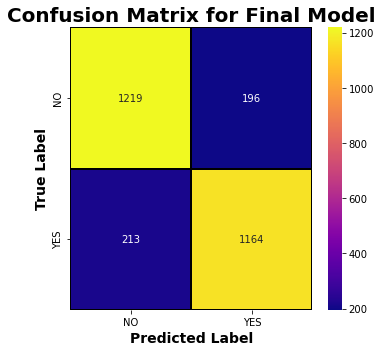

In [82]:
# Lets plot confusion matrix for  FinalModel
Matrix = confusion_matrix(Y_test, y_pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

Saving model

In [84]:
import joblib
joblib.dump(Final_mod,'Customer_Churn_Final.pkl')

['Customer_Churn_Final.pkl']

Predicting the Final Model

In [85]:
# Prediction
prediction = Final_mod.predict(X_test)

In [86]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
